# Graphnet-Automata Model Revision, #1

## First we import the necessary libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from numba import jit
import community

In [2]:
import warnings; warnings.simplefilter('ignore')

## The evolution function has been changed to allow for directed graphs

In [3]:
@jit(nopython = True)
def generator(A):
    B = np.zeros((len(A)+2, len(A)+2), np.int_)
    B[1:-1,1:-1] = A
    for i in range(len(B)):
        for j in range(len(B)):
            count = 0
            count += B[i][j]
            if i-1 > 0:
                count += B[i-1][j]
            if i+1 < len(B):
                count += B[i+1][j]
            if j-1 > 0:
                count += B[i][j-1]
            if j+1 < len(B):
                count += B[i][j+1]
            if count == 0:
                B[i][j] = 1
            if count <= 4 and count > 0 and B[i][j] == 1:
                B[i][j] = 0
            if count > 4 and B[i][j] == 1:
                B[i][j] = 1
    Bnext = np.zeros_like(B, np.int_)
    Bnext = B
    return(Bnext)

In [4]:
try:
    from functools import lru_cache
except ImportError:
    from backports.functools_lru_cache import lru_cache

## The recursive fuction is the same

In [5]:
def generator2(A_, number):
  time = 0
  while time < number:
    A_ = generator(A_)
    time += 1
  return A_

## A three-node (odd), random, undirected graph is used as a "seed" graph.

[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]


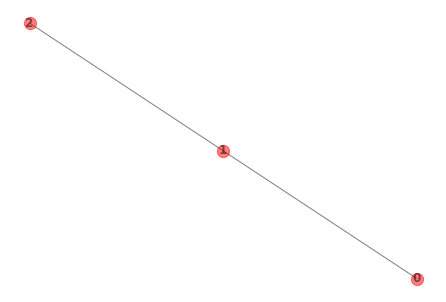

In [6]:
g1 = nx.erdos_renyi_graph(3, 0.8, seed = 1, directed=False)
A1 = nx.to_numpy_matrix(g1)
print(A1)
nx.draw(g1, node_size=150, alpha=0.5, with_labels=True, font_weight = 'bold')
#plt.savefig('ga02_g1_0.png')
plt.show()

## 100 recursion leads to a whip-like graph structure

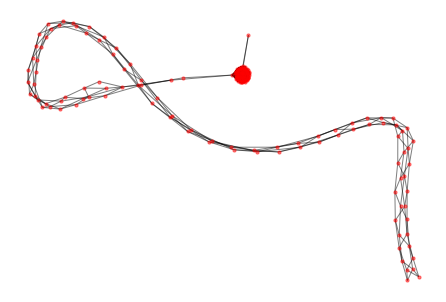

In [7]:
gen_A1 = generator2(A1,100)
gen_g1 = nx.from_numpy_matrix(gen_A1)
nx.draw(gen_g1, node_size=10, alpha=0.5)
plt.savefig('ga02_g1_100.png')
plt.show()

## Community partitioning shows the whip-like structure is has two communities, the "head" and the "tail."

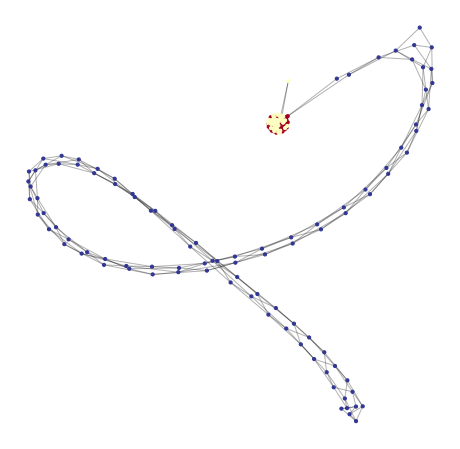

In [8]:
partition = community.best_partition(gen_g1)
pos = nx.spring_layout(gen_g1)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g1, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g1, pos, alpha=0.3)
plt.savefig('ga02_g1_100_community.png')
plt.show(gen_g1)

## To quantify this graph structure, the distribution of the geodesic length is shown.

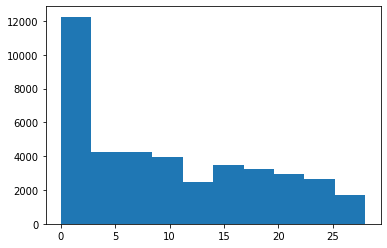

In [9]:
length_gen_g1 = dict(nx.all_pairs_shortest_path_length(gen_g1))
path_gen_g1 = dict(nx.all_pairs_shortest_path(gen_g1))
len_gen_g1 = []
for node1 in length_gen_g1:
    for node2 in length_gen_g1[node1]:
        len_gen_g1.append(length_gen_g1[node1][node2])
plt.hist(len_gen_g1)
plt.show()

## The same is repeated for a four-node (even) "seed" graph.

[[0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


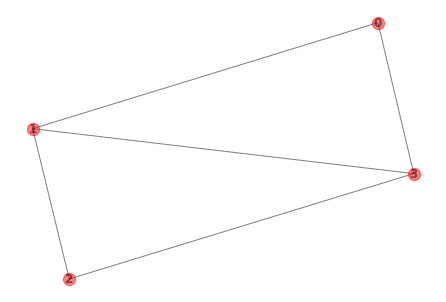

In [10]:
g2 = nx.erdos_renyi_graph(4, 0.8, seed = 1, directed=False)
A2 = nx.to_numpy_matrix(g2)
print(A2)
nx.draw(g2, node_size=150, alpha=0.5, with_labels=True, font_weight = 'bold')
#plt.savefig('ga02_g2_0.png')
plt.show()

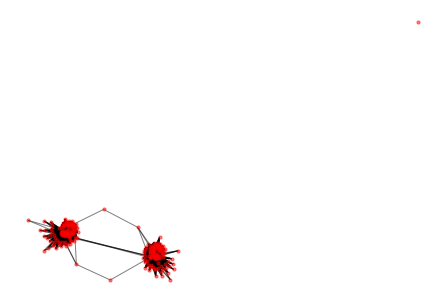

In [11]:
gen_A2 = generator2(A2, 100)
gen_g2 = nx.from_numpy_matrix(gen_A2)
nx.draw(gen_g2, node_size=10, alpha=0.5)
#plt.savefig('ga02_g2_100.png')
plt.show()

## The evolved graph is similar to ga01 for even "seed" graphs.

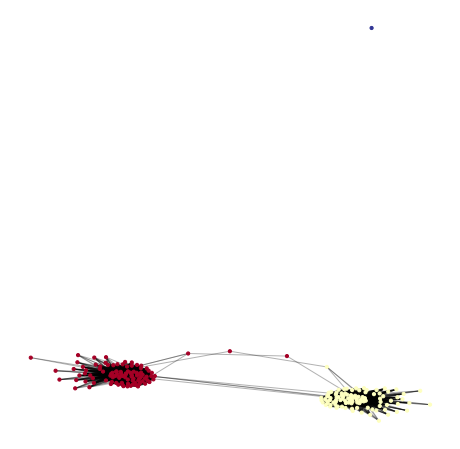

In [12]:
partition = community.best_partition(gen_g2)
pos = nx.spring_layout(gen_g2)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g2, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g2, pos, alpha=0.3)
#plt.savefig('ga02_g2_100_community.png')
plt.show(gen_g2)

## The geodesic length distribution is distinctly divided into three length categories.

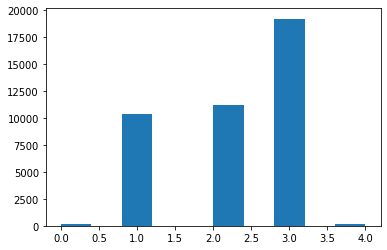

In [13]:
length_gen_g2 = dict(nx.all_pairs_shortest_path_length(gen_g2))
path_gen_g2 = dict(nx.all_pairs_shortest_path(gen_g2))
len_gen_g2 = []
for node1 in length_gen_g2:
    for node2 in length_gen_g2[node1]:
        len_gen_g2.append(length_gen_g2[node1][node2])
plt.hist(len_gen_g2)
plt.show()